In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rcParams['figure.dpi'] = 100.0

import os
import sys
sys.path.insert(0, '/global/common/cori/contrib/lsst/apps/anaconda/py2-envs/DESCQA/lib/python2.7/site-packages')

In [2]:
from GCR import load_catalog

In [4]:
gc_alphaq = load_catalog(os.path.join(os.pardir, 'catalogs', 'proto-dc2-v1.0.yaml'))
gc_buzzard = load_catalog(os.path.join(os.pardir, 'catalogs', 'buzzard_v1.5.yaml'))

#for testing purpose, use only one pixel for buzzard
gc_buzzard.set_healpixel_list([0])

gc = dict(AlphaQ=gc_alphaq, Buzzard=gc_buzzard)

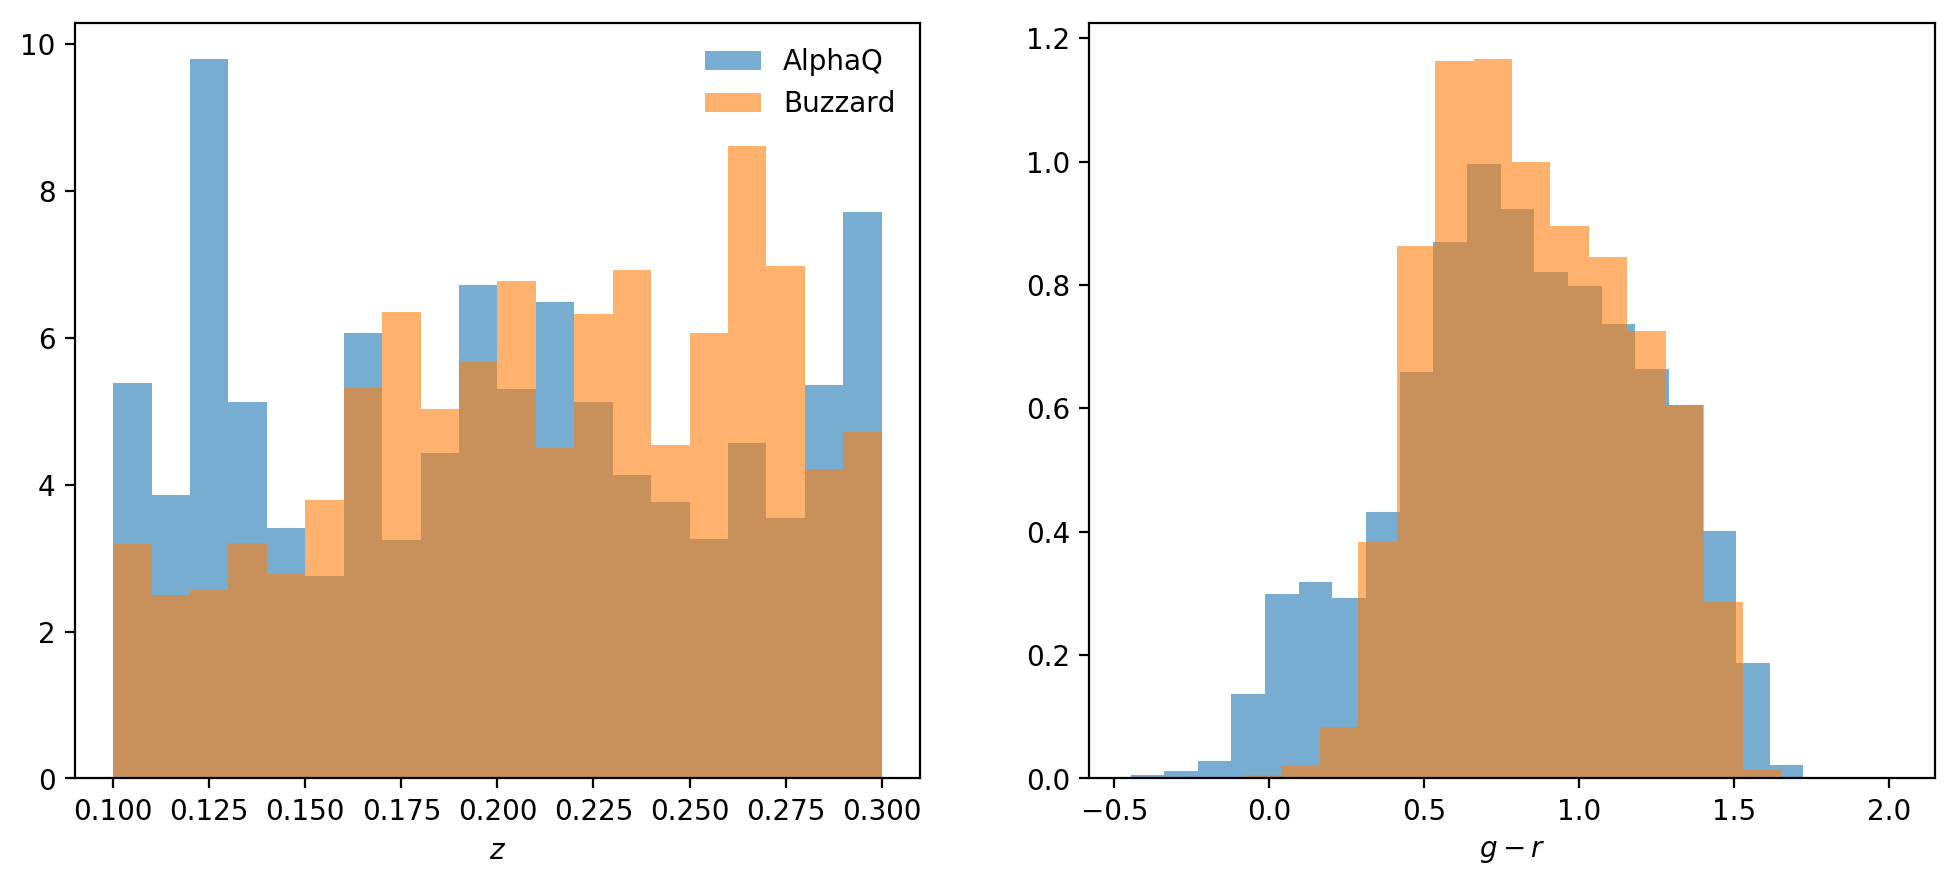

In [5]:
fig, ax = plt.subplots(ncols=2, figsize=(12,5))
for label, gc_this in gc.items():
    data = gc_this.get_quantities(['redshift_true', 'mag_g_any', 'mag_r_any'], 
                                  filters=[(lambda z: (z > 0.1) & (z < 0.3), 'redshift_true')], 
                                  return_ndarray=True)
    data = data[np.isfinite(data['mag_g_any']) & np.isfinite(data['mag_r_any'])]
    data = data[data['mag_r_any'] < 22.0]
    ax[0].hist(data['redshift_true'], 20, normed=True, alpha=0.6, label=label);
    ax[1].hist(data['mag_g_any'] - data['mag_r_any'], 20, normed=True, alpha=0.6);

ax[0].legend(frameon=False);
ax[0].set_xlabel('$z$');
ax[1].set_xlabel('$g-r$');

In [9]:
gc['Buzzard'].get_input_kwargs()

{'catalog_dir': '/global/project/projectdirs/lsst/jderose/BCC/Chinchilla/Herd/Chinchilla-0/addgalspostprocess',
 'catalog_subdirs': ['truth'],
 'cosmo_Omega_M0': 0.286,
 'cosmo_h': 0.7,
 'creators': ['Joe DeRose'],
 'filename_template': 'Chinchilla-0_lensed.{}.fits',
 'npix': 768,
 'subclass_name': 'BuzzardGalaxyCatalog'}

In [10]:
gc['Buzzard'].list_all_quantities()

['galaxy_id',
 'redshift',
 'redshift_true',
 'ra',
 'dec',
 'ra_true',
 'dec_true',
 'halo_id',
 'halo_mass',
 'is_central',
 'ellipticity_1',
 'ellipticity_2',
 'ellipticity_1_true',
 'ellipticity_2_true',
 'size',
 'size_true',
 'shear_1',
 'shear_2',
 'convergence',
 'magnification',
 'position_x',
 'position_y',
 'position_z',
 'velocity_x',
 'velocity_y',
 'velocity_z',
 'Mag_true_g_des_z01',
 'Mag_true_g_any',
 'mag_g_des',
 'mag_g_any',
 'magerr_g_des',
 'magerr_g_any',
 'Mag_true_r_des_z01',
 'Mag_true_r_any',
 'mag_r_des',
 'mag_r_any',
 'magerr_r_des',
 'magerr_r_any',
 'Mag_true_i_des_z01',
 'Mag_true_i_any',
 'mag_i_des',
 'mag_i_any',
 'magerr_i_des',
 'magerr_i_any',
 'Mag_true_z_des_z01',
 'Mag_true_z_any',
 'mag_z_des',
 'mag_z_any',
 'magerr_z_des',
 'magerr_z_any',
 'Mag_true_Y_des_z01',
 'Mag_true_Y_any',
 'mag_Y_des',
 'mag_Y_any',
 'magerr_Y_des',
 'magerr_Y_any']

In [11]:
gc['Buzzard'].list_all_native_quantities()

[('truth', 'IVAR', 2),
 ('truth', 'ECATID'),
 ('truth', 'RA'),
 ('truth', 'LMAG', 1),
 ('truth', 'IVAR', 4),
 ('truth', 'AMAG', 4),
 ('truth', 'NGALS'),
 ('truth', 'RHALO'),
 ('truth', 'OMAGERR', 0),
 ('truth', 'OMAGERR', 2),
 ('truth', 'HALOID'),
 ('truth', 'AMAG', 0),
 ('truth', 'VY'),
 ('truth', 'OMAGERR', 4),
 ('truth', 'W'),
 ('truth', 'SIGMA5'),
 ('truth', 'SIZE'),
 ('truth', 'COEFFS', 1),
 ('truth', 'COEFFS', 3),
 ('truth', 'ID'),
 ('truth', 'TSIZE'),
 ('truth', 'VX'),
 ('truth', 'PZ'),
 ('truth', 'TRA'),
 'original_healpixel',
 ('truth', 'TE', 1),
 ('truth', 'TMAG', 1),
 ('truth', 'OMAG', 2),
 ('truth', 'TMAG', 3),
 ('truth', 'FLUX', 2),
 ('truth', 'OMAG', 0),
 ('truth', 'FLUX', 0),
 ('truth', 'AMAG', 3),
 ('truth', 'CENTRAL'),
 ('truth', 'GAMMA2'),
 ('truth', 'AMAG', 1),
 ('truth', 'EPSILON', 1),
 ('truth', 'LMAG', 2),
 ('truth', 'OMAG', 4),
 ('truth', 'DEC'),
 ('truth', 'IVAR', 1),
 ('truth', 'FLUX', 4),
 ('truth', 'PY'),
 ('truth', 'LMAG', 0),
 ('truth', 'IVAR', 3),
 ('truth